## Applying Log transformations - Importance values and Model Evaluation

This will help in reducing the *right amount of  skewness* and is often appropriate for measured variables in the dataset. Here this transformation is applied to all the values and the feature importance is evaluated for the dataset 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cover = pd.read_csv('train_cleaned.csv')
cover.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [2]:
# given column names
cover.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type'],
      dtype

In [3]:
# Renaming the columns for easier access
new_cols = ['elevation','aspect','slope','hd_hy','vd_hy','hd_rd','hs_9','hs_noon','hs_3',
            'hd_fp','wa1','wa2','wa3','wa4',
            's1','s2','s3','s4','s5','s6','s8','s9','s10',
            's11','s12','s13','s14','s16','s17','s18','s19','s20',
            's21','s22','s23','s24','s25','s26','s27','s28','s29','s30',
            's31','s32','s33','s34','s35','s36','s37','s38','s39','s40',
            'cover_type']
cover.columns = new_cols

### Performing Log transformation to the data
This is one attempt to feature transformation to see if there is improvement in accuracy. It is based on the sign of the skew for the features. When 
skew is positive then the transformation is given by $\log_{10}(df[before]+1)$ 
<br> when the skew is negative then the transformation is given by
$\log_{10}(1-df[before])$

Here `df` is the dataframe under consideration and is applied to all the values of the dataframe

In [4]:
def transform( df, before, after ):
    # Note: we do different transformations depending on the sign of the feature's skew
    print("%s => %s" % (before,after))
    delta = 1
    skew_sign = df[before].skew()
    if (skew_sign > 0):
        if (df[before].min() < 0): delta += -(df[before].min())
            # Applying log transformation for positive skew
        df[after] = df[before].apply(lambda x: np.log10(x+delta))
    else:
        delta += df[before].max()
            # Applying log transformation for negative skew
        df[after] = df[before].apply(lambda x: np.log10(delta-x))
        
    print("Minimum value (before):",df[before].min())
    print("Maximum value (before):",df[before].max())
    print("Skew (before):", df[before].skew())
    print("Skew (after):", df[after].skew())
    print("Minimum (after):",df[after].min())
    print("Maximum (after):",df[after].max())
    return df

In [5]:
def apply_transformations( new_data ):
    new_data = transform(new_data,'hd_hy', 'hd_hy_log' )
    new_data = transform(new_data,'hd_hy_log', 'hd_hy_log_log' )
    new_data = transform(new_data,'vd_hy', 'vd_hy_log' )
    new_data = transform(new_data,'hd_rd', 'hd_rd_log' )
    new_data = transform(new_data,'hs_9',  'hs_9_log' )
    new_data = transform(new_data,'hs_9_log',  'hs_9_log_log' )
    new_data = transform(new_data,'hd_fp', 'hd_fp_log' )
    return new_data

new_cover = apply_transformations(cover)
new_cover.head(3)

hd_hy => hd_hy_log
Minimum value (before): 0
Maximum value (before): 1343
Skew (before): 1.4880524908584847
Skew (after): -1.6089165303428363
Minimum (after): 0.0
Maximum (after): 3.1283992687178066
hd_hy_log => hd_hy_log_log
Minimum value (before): 0.0
Maximum value (before): 3.1283992687178066
Skew (before): -1.6089165303428363
Skew (after): 0.9246254698830114
Minimum (after): 1.9286549331065737e-16
Maximum (after): 0.6157816924504698
vd_hy => vd_hy_log
Minimum value (before): -146
Maximum value (before): 554
Skew (before): 1.5377756804960931
Skew (after): 0.03521676381570889
Minimum (after): 0.0
Maximum (after): 2.8457180179666586
hd_rd => hd_rd_log
Minimum value (before): 0
Maximum value (before): 6890
Skew (before): 1.247810678465482
Skew (after): -0.6892190307043152
Minimum (after): 0.0
Maximum (after): 3.8382822499146885
hs_9 => hs_9_log
Minimum value (before): 0
Maximum value (before): 254
Skew (before): -1.0936805605383073
Skew (after): -1.1362708484557602
Minimum (after): 0.0

,elevation,aspect,slope,hd_hy,vd_hy,hd_rd,hs_9,hs_noon,hs_3,hd_fp,...,s39,s40,cover_type,hd_hy_log,hd_hy_log_log,vd_hy_log,hd_rd_log,hs_9_log,hs_9_log_log,hd_fp_log
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,5,2.413300,0.234289,2.167317,2.708421,1.531479,0.273015,3.797960
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,5,2.328380,0.255277,2.149219,2.592177,1.544068,0.270090,3.794209
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,2,2.429752,0.230103,2.326336,3.502564,1.322219,0.318965,3.786893


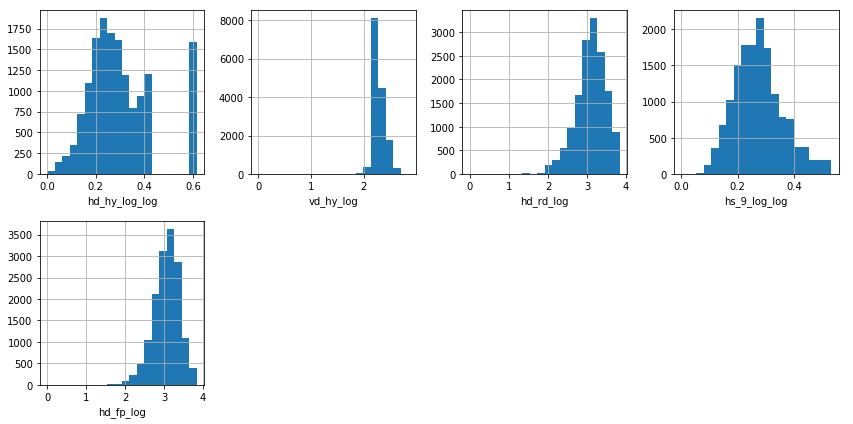

In [6]:
import matplotlib.gridspec as gridspec
models = dict()
def get_axes( gs, plt, rows, cols ):
    axes = list()
    for i in range(rows):
        for j in range(cols):
            axes.append( plt.subplot( gs[i,j] ) )
    return axes


rows, cols = 2, 4
fig  = plt.figure(figsize=(12, 6))
gs   = gridspec.GridSpec(rows, cols)
axes = get_axes( gs, plt, rows, cols )

plot_these = ['hd_hy_log_log','vd_hy_log','hd_rd_log','hs_9_log_log','hd_fp_log']

for i, feature_name in enumerate(plot_these):
    new_cover[feature_name].hist(ax=axes[i], bins=20)
    axes[i].set_xlabel(feature_name)

for i in [5,6,7]: axes[i].axis('off')

plt.tight_layout()
plt.show()

### Result
**More gaussian like!!**

### Applying Feature importance to the log-transformed cloumns

#### Extra trees

In [7]:
## Extratrees
# importing model for feature importance
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate
model = ExtraTreesClassifier(random_state = 53,n_estimators=10)
                             
# Data
X = new_cover.iloc[:,:-1]
# Output
y = new_cover['cover_type']

# training the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
ETC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ETC']).sort_values('ETC', ascending=False)

# removing traces of this model
model = None

# Store the feature importances of ETC
df_ETC = ETC_feature_importances
models['etc'] = list(df_ETC.iloc[:,0])

#### Random Forests

In [8]:
## Random Forests
# importing model for feature importance
from sklearn.ensemble import RandomForestClassifier

# Instantiate
model = RandomForestClassifier(random_state = 53,n_estimators=10)

# training the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
RFC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['RFC']).sort_values('RFC', ascending=False)

# removing traces of this model
model = None

# Store the importance features from RFC
df_RFC = RFC_feature_importances
models['rfc'] = list(df_RFC.iloc[:,0])

#### Ada-boost

In [9]:
## Ada-boost
# importing model for feature importance
from sklearn.ensemble import AdaBoostClassifier

# Instantiate
model = AdaBoostClassifier(random_state = 53)

model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
ADB_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ADB']).sort_values('ADB', ascending=False)

# removing traces of this model
model = None

# Store the feature importances of adaboost
df_adaboost = ADB_feature_importances
models['adb'] = list(df_adaboost.iloc[:,0])

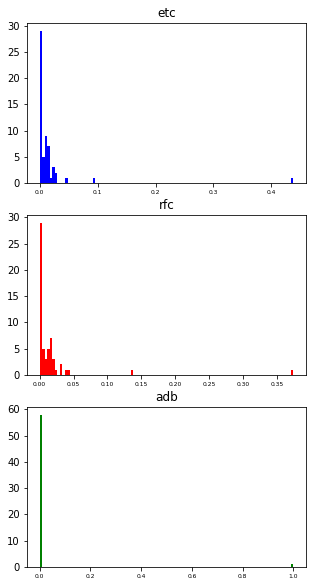

In [10]:
import matplotlib.pyplot as plt 
list_names = ['etc','rfc','adb']
values = np.arange(311,314)
plt.figure(figsize=(5,10))
color_list = ['b','r','g']
for name, value, index in zip(list_names,values,range(len(color_list))):
    ax1 = plt.subplot(value)
    fig = plt.hist(models[name],bins=100,color=color_list[index])
    plt.title(name)
    plt.setp(ax1.get_xticklabels(), fontsize=6)
    plt.savefig('full')

### OBSERVATIONS

- Elevation, Vertical and Horizontal distance to Hydrology show presence in top 10 for the classifiers under consideration, hence important features even after using the log transformation.
- Numerical values in the features show a greater presence than the categorical feature. So using them in the transformed form will acknowledge the improvement in the accuracy
- Next notebook is about how would we be to vary the number of features from top 10 to 15 and evaluating the performance for the log transformed features.

In [11]:
dataset = new_cover

In [12]:
from sklearn.model_selection import cross_val_score

# for calculating time elapsed
import time

# fucntion
def model_evaluation(clf, X_train, y_train):
    
    # passing classifier to a variable
    clf = clf
    
    # records time
    t_start = time.time()
    # classifier learning the model
    clf = clf.fit(X_train, y_train)
    # records time
    t_end = time.time()
    
    
    # records time
    c_start = time.time()     
    # Using 10 K-Fold CV on data, gives peroformance measures
    accuracy  = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    f1_score = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'f1_macro')
    # records the time
    c_end = time.time()    
    
    
    # calculating mean of all 10 observation's accuracy and f1, taking percent and rounding to two decimal places
    acc_mean = np.round(accuracy.mean() * 100, 2)
    f1_mean = np.round(f1_score.mean() * 100, 2)
    
    
    # substracts end time with start to give actual time taken in seconds
    # divides by 60 to convert in minutes and rounds the answer to three decimal places
    # time in training
    t_time = np.round((t_end - t_start) / 60, 3)
    # time for evaluating scores
    c_time = np.round((c_end - c_start) / 60, 3)
    
    
    # Removing traces of classifier
    clf = None
    
    
    # returns performance measure and time of the classifier 
    print("The accuracy score of this classifier on our training set is", acc_mean,"% and f1 score is", f1_mean,"% taking", t_time,"minutes to train and", c_time,
          "minutes to evaluate cross validation and metric scores.\n")

### Applying Models to the log-transformed dataset
This is the continuation to apply the following feature transformations to the log-transformed clean dataset. The models used are `KNN, Randomforests, SGD, Extratrees and Logistic Regression`

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.exceptions import DataConversionWarning
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings(action='ignore')

X = np.array(dataset.iloc[:,:-1])
y = np.array(dataset['cover_type'])

scaler = [ 0,StandardScaler(), Normalizer(), MinMaxScaler()]
names = ['No Scaling used','Standard Scaler','Normalizer','Minmax']
model_list = ['KNN', 'Random Forests', 'SGD', 'Extratrees', 'Logistic Regression']
models = [KNeighborsClassifier(n_jobs=-1),RandomForestClassifier(n_jobs=-1, random_state = 53),\
          SGDClassifier(n_jobs=-1, random_state = 53),ExtraTreesClassifier(n_jobs=-1, random_state = 53),\
          LogisticRegression(n_jobs = -1, random_state = 53)]
print('Start!')
print('-------------------------------------------------')
for sc, name in zip(scaler,names):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state=42, shuffle= True)
    if sc!=0:
        X_train = sc.fit_transform(X_train)
        X_val = sc.transform(X_val)
    if sc!=0:
        print('Scaler used: ', name)
    else:
        print(name)
    for model_name, model_value in zip(model_list,models):
        print(f'\nEvaluating for {model_name}\n')
        model_evaluation(model_value,X_train, y_train)
    print('-------------------------------------------------')
print('Done!')

Start!
-------------------------------------------------
No Scaling used

Evaluating for KNN

The accuracy score of this classifier on our training set is 79.27 % and f1 score is 78.51 % taking 0.001 minutes to train and 0.086 minutes to evaluate cross validation and metric scores.


Evaluating for Random Forests

The accuracy score of this classifier on our training set is 98.89 % and f1 score is 98.89 % taking 0.003 minutes to train and 0.058 minutes to evaluate cross validation and metric scores.


Evaluating for SGD

The accuracy score of this classifier on our training set is 25.78 % and f1 score is 17.35 % taking 0.002 minutes to train and 0.038 minutes to evaluate cross validation and metric scores.


Evaluating for Extratrees

The accuracy score of this classifier on our training set is 99.41 % and f1 score is 99.41 % taking 0.002 minutes to train and 0.058 minutes to evaluate cross validation and metric scores.


Evaluating for Logistic Regression

The accuracy score of this c

In [14]:
# importing EM scores for model performance measure
from sklearn.metrics import accuracy_score, f1_score

X = np.array(dataset.iloc[:,:-1])
y = np.array(dataset['cover_type'])

scaler = [ 0,StandardScaler(), Normalizer(), MinMaxScaler()]
names = ['No Scaling used','Standard Scaler','Normalizer','Minmax']

print('Start!')
print('-------------------------------------------------')
for sc, name in zip(scaler,names):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state=42, shuffle= True)
    if sc!=0:
        X_train = sc.fit_transform(X_train)
        X_val = sc.transform(X_val)
    # definning best chosen classifier
    clf = RandomForestClassifier(n_estimators = 50, random_state = 53)
    # training our model
    clf = clf.fit(X_train, y_train)
    # predicting unseen data
    predict = clf.predict(X_val)
    # calculating accuracy
    accuracy = accuracy_score(y_val, predict)
    # taking precentage and rounding to 3 places
    accuracy = np.round(accuracy * 100, 3)
    # cleaning traces
    clf = None
    # results
    if sc!=0:
        print('Scaler used: ', name)
    else:
        print(name)
    print("\nThe accuracy score of our final model Random Forest Classifier on our validation set is", accuracy," %.\n")

Start!
-------------------------------------------------
No Scaling used

The accuracy score of our final model Random Forest Classifier on our validation set is 99.656  %.

Scaler used:  Standard Scaler

The accuracy score of our final model Random Forest Classifier on our validation set is 99.656  %.

Scaler used:  Normalizer

The accuracy score of our final model Random Forest Classifier on our validation set is 99.312  %.

Scaler used:  Minmax

The accuracy score of our final model Random Forest Classifier on our validation set is 99.656  %.



In [15]:
cover_test = pd.read_csv('test.csv')
cover_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [16]:
feature_names = list(cover_test)[:]

X_test = cover_test[feature_names]

X_test = X_test.drop(["Id","Soil_Type31","Soil_Type37"], axis = 1)
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 52 columns):
Elevation                             565892 non-null int64
Aspect                                565892 non-null int64
Slope                                 565892 non-null int64
Horizontal_Distance_To_Hydrology      565892 non-null int64
Vertical_Distance_To_Hydrology        565892 non-null int64
Horizontal_Distance_To_Roadways       565892 non-null int64
Hillshade_9am                         565892 non-null int64
Hillshade_Noon                        565892 non-null int64
Hillshade_3pm                         565892 non-null int64
Horizontal_Distance_To_Fire_Points    565892 non-null int64
Wilderness_Area1                      565892 non-null int64
Wilderness_Area2                      565892 non-null int64
Wilderness_Area3                      565892 non-null int64
Wilderness_Area4                      565892 non-null int64
Soil_Type1                            565892 non-

### RESULT DISCUSSION
The improvement in the results were not significant as before. This can be due to the insignificant effect of the skewness in the features and the classes 1 and 2. But, it was worth the shot to try a new transformation on the dataset to check its attribute. The best shot given in Kaggle generated a 72% accuracy using the Extra Trees classifier without log transformation and 71% with log transformation.